### Modification to plot a square in the complex palne with center in *(z_c_r,  z_c_i)* and of size *zw* x *zh* 

Code modfied from [Fractals with Python - The Newton Set](https://blog.anvetsu.com/posts/fractals-newton-python-matplotlib-numpy/).

German Hernandez

<img src="https://raw.githubusercontent.com/gjhernandezp/algorithms/master/Z3_1centermap.png" width="80%" alt="RGB for Numpy" style="top">.


In [ ]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
def f(z):
    functions = [z**2, (z - 1)**2, z**2 - 1, z**2 + 1]
    return functions

def df(z):
    functions = [2 * z, (2 * z) - 2]
    return functions

In [ ]:
def newton_set1(z_c_r=0, z_c_i=0, zh = 5, zw=5, width=500, height=500, zoom=1, niter=256, fu=2, dfu=0, r1=1):
    """ Fractals using newton-raphson """
    # Pixels array
    pixels = np.arange(width * height * 3, dtype=np.uint32).reshape(height, width, 3)
    eps = 1e-3 # max error allowed

    # Bounding roots
    r2 = -1

    # Color multiplication factor
    # NOTE: Increasing this darkens the image and lightens it otherwise
    multcol = 10

    for y in range(height):
        zy = z_c_i + (((y - (height / 2)) / height) * zh * zoom)
        for x in range(width):
            zx = z_c_r + (((x - (width / 2)) / width) * zw * zoom)
                # Mapping real -> complex plane
            z = complex(zx, zy)
            count = 0
            for i in range(niter):
                    # complex numerical derivative
                dz = df(z)[dfu]
                if dz == 0:
                    break
                count += 1
                if count > 255:
                    break
                z -= (f(z)[fu] / dz) # Newton iteration
                    # Pixels colored using the roots
                if abs(z - r1) <= eps:
                        # color red
                    pixels[height - y - 1, x] = (255 - ((count * multcol) % 255), 50, 50)
                    break
                elif abs(z - r2) <= eps:
                        # color green
                    pixels[height - y - 1, x] = (75, 255 - ((count * multcol) % 255), 35)
                    break
                else:   
                    pixels[height - y - 1, x] = (39, 40, 38)
    return pixels

In [ ]:
def display1(z_c_r=0, z_c_i=0, zh=5, zw=5, width=500, height=500, zoom=1, niter=256, fu=2, dfu=0, r1=1):
    """ Display a newton-raphson fractal """
    
    title = "Newton Fractal X in\n ({}, {}i) to ({}, {}i)".format(z_c_r + (((0 - (width / 2)) / width) * zw * zoom), 
                                                              z_c_i + (((0 - (height / 2)) / height) * zh * zoom),
                                                              z_c_r + (((width - (width / 2)) / width) * zw * zoom),
                                                              z_c_i + (((height - (height / 2)) / height) * zh * zoom))
    pimg = newton_set1(z_c_r=z_c_r, z_c_i=z_c_i, zh=zh, zw=zw, width=width, height=width, zoom=zoom, niter=niter, fu=fu, dfu=dfu, r1=r1)
    xlabel = "real" + "(" + str(z_c_r + (((0 - (width / 2)) /width) * zw * zoom)) + "," + str(z_c_r + (((width - (width / 2)) / width) * zw * zoom)) + ")"
    ylabel = "imaginary" + "(" + str(z_c_i + (((0 - (height / 2)) / height) * zh * zoom)) + "," + str(z_c_i + (((height - (height / 2)) / height) * zh * zoom)) + ")"
    return (pimg, xlabel, ylabel, title)

In [ ]:
def newton_iteration(z=(10.0 + 0.0j), fu=0, dfu=0):
    r = []
    img = []
    for i in range(50):
        dz = df(z)[dfu]
        z =  z - (f(z)[fu] / dz)
        r.append(np.real(z))
        img.append(np.imag(z))
    return (r, img)

## Analitics Roots of $x^2$
### Clasic way 
$\begin{equation}
\begin{split}
x^2 &= 0\\
x & = 0
\end{split}
\end{equation}$
### Po  Shen Lonh's
$\begin{equation}
\begin{split}
-\frac{0}{2} - x^2 &= 0\\
0 - x^2 &= 0\\
x &= 0
\end{split}
\end{equation}$


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


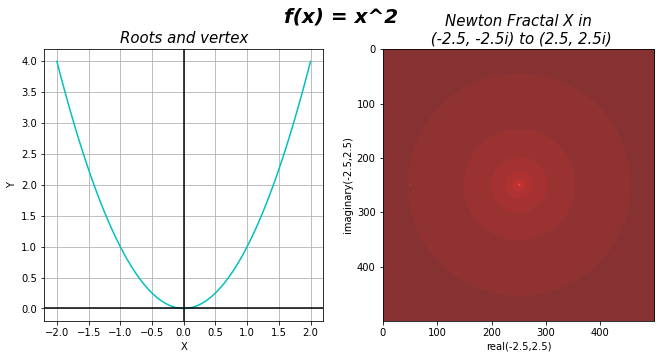

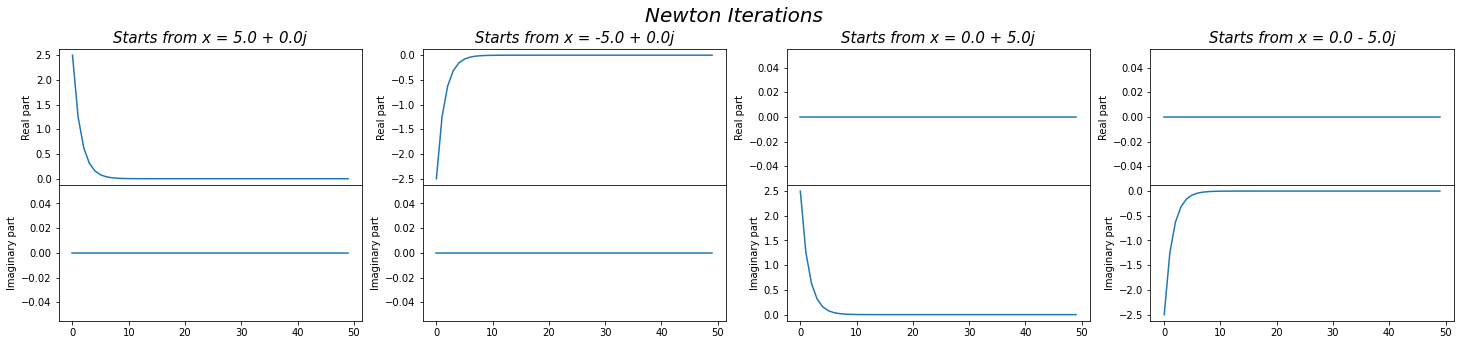

In [ ]:
x = np.linspace(-2.0,2.0,100)
function = f(x)
(pimg, xlabel, ylabel, title) = display1(zoom=1, fu=0, dfu=0, r1=0);
fig, axs = plt.subplots(ncols=2, nrows=1, gridspec_kw={'hspace': 0.7, 'wspace' : 0.2}, figsize=(11, 5))
fig.suptitle("f(x) = x^2",fontsize=20, va='center', y=.97, fontstyle='oblique', fontweight='bold')

axs[0].plot(x,function[0], color='c')
axs[0].set_title('Roots and vertex', fontsize=15, fontstyle='italic')
axs[0].grid(b=True, axis='both')
axs[0].axhline(y=0, color='k')
axs[0].axvline(x=0, color='k')
axs[0].set_xlabel('X', fontsize=10)
axs[0].set_ylabel('Y', fontsize=10)

axs[1].imshow(pimg);
axs[1].set_title(title, fontsize=15, fontstyle='italic')
axs[1].set_xlabel(xlabel, fontsize='medium')
axs[1].set_ylabel(ylabel, fontsize=10);


fig, axs = plt.subplots(ncols=4, nrows=2, gridspec_kw={'hspace': 0, 'wspace' : 0.2}, figsize=(25, 5));
fig.suptitle("Newton Iterations",fontsize=20, va='center', y=.97, fontstyle='oblique')

(r, i) = newton_iteration(z=(5.0 + 0.0j),fu=0, dfu=0)
axs[0, 0].plot(r)
axs[0, 0].set_ylabel("Real part",fontsize='medium')
axs[0, 0].set_title("Starts from x = 5.0 + 0.0j", fontsize=15, fontstyle='italic')
axs[1, 0].plot(i)
axs[1, 0].set_ylabel("Imaginary part",fontsize='medium');

(r, i) = newton_iteration(z=(-5.0 + 0.0j),fu=0, dfu=0)
axs[0, 1].plot(r)
axs[0, 1].set_ylabel("Real part",fontsize='medium')
axs[0, 1].set_title("Starts from x = -5.0 + 0.0j", fontsize=15, fontstyle='italic')
axs[1, 1].plot(i)
axs[1, 1].set_ylabel("Imaginary part",fontsize='medium');

(r, i) = newton_iteration(z=(0.0 + 5.0j),fu=0, dfu=0)
axs[0, 2].plot(r)
axs[0, 2].set_ylabel("Real part",fontsize='medium')
axs[0, 2].set_title("Starts from x = 0.0 + 5.0j", fontsize=15, fontstyle='italic')
axs[1, 2].plot(i)
axs[1, 2].set_ylabel("Imaginary part",fontsize='medium');

(r, i) = newton_iteration(z=(0.0 - 5.0j),fu=0, dfu=0)
axs[0, 3].plot(r)
axs[0, 3].set_ylabel("Real part",fontsize='medium')
axs[0, 3].set_title("Starts from x = 0.0 - 5.0j", fontsize=15, fontstyle='italic')
axs[1, 3].plot(i)
axs[1, 3].set_ylabel("Imaginary part",fontsize='medium');

### Análisis
Se puede observar la presencia de una raiz en en $0$, y que sin importar desde donde comiencen las iteraciones de *Newton* convergera considerablemente repido ya que le toma apenas mas de 10 iteraciones para llegar a una aproximacion de la raiz calculada analiticamente, sin embargo, al ser la raiz 0 al hacer las iteraciones de Newton desde el punto $0+0i$ la derivada es 0 por ende no permita ser graficada ya que da un error de dvision por cero.

## Analitics roots of $(x - 1)^2$
### Clasic way
$\begin{equation}
\begin{split}
(x-1)^2 &= x^2 -2x + 1 & \\
x &= \frac{2\ \pm\sqrt{4 - 4}}{2} \\
x &= 1
\end{split}
\end{equation}$
### Po Shen Lonh's
$\begin{equation}
\begin{split}
1 - x^2 &= 1\\
x^2 &= 0\\
x &= 1
\end{split}
\end{equation}$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


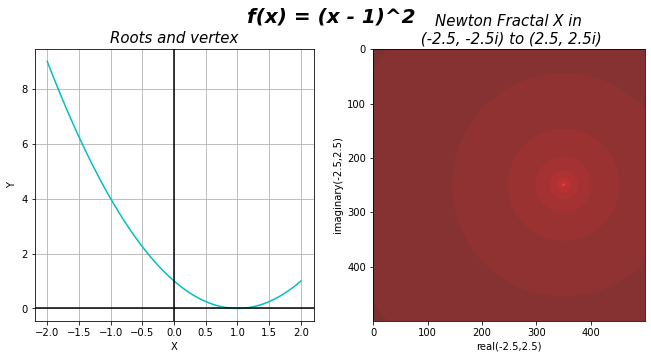

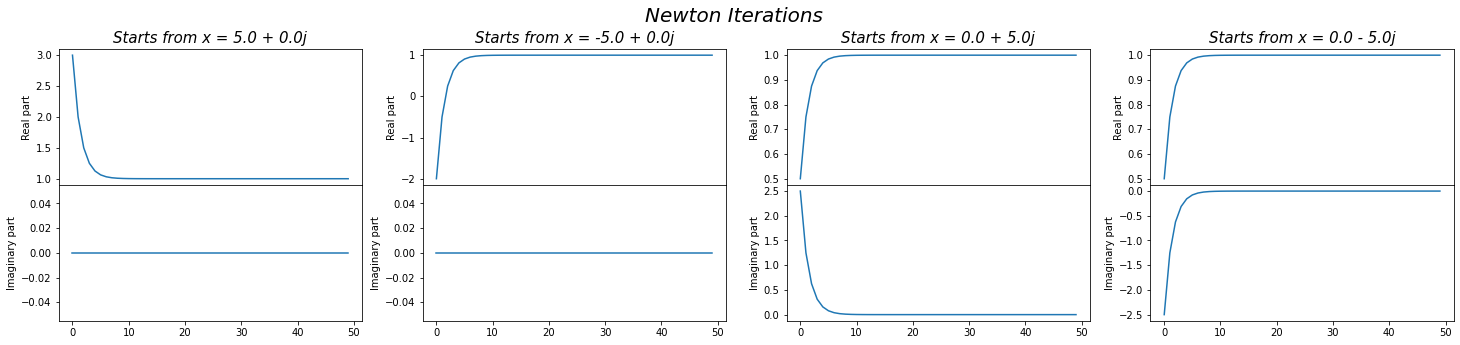

In [ ]:
(pimg, xlabel, ylabel, title) = display1(zoom=1, fu=1, dfu=1, r1=1);
fig, axs = plt.subplots(ncols=2, nrows=1, gridspec_kw={'hspace': 0.7, 'wspace' : 0.2}, figsize=(11, 5))
fig.suptitle("f(x) = (x - 1)^2",fontsize=20, va='center', y=.97, fontstyle='oblique', fontweight='bold')

axs[0].plot(x,function[1], color='c')
axs[0].set_title('Roots and vertex', fontsize=15, fontstyle='italic')
axs[0].grid(b=True, axis='both')
axs[0].axhline(y=0, color='k')
axs[0].axvline(x=0, color='k')
axs[0].set_xlabel('X', fontsize=10)
axs[0].set_ylabel('Y', fontsize=10)

axs[1].imshow(pimg);
axs[1].set_title(title, fontsize=15, fontstyle='italic')
axs[1].set_xlabel(xlabel, fontsize='medium')
axs[1].set_ylabel(ylabel, fontsize=10);


fig, axs = plt.subplots(ncols=4, nrows=2, gridspec_kw={'hspace': 0, 'wspace' : 0.2}, figsize=(25, 5));
fig.suptitle("Newton Iterations",fontsize=20, va='center', y=.97, fontstyle='oblique')

(r, i) = newton_iteration(z=(5.0 + 0.0j),fu=1, dfu=1)
axs[0, 0].plot(r)
axs[0, 0].set_ylabel("Real part",fontsize='medium')
axs[0, 0].set_title("Starts from x = 5.0 + 0.0j", fontsize=15, fontstyle='italic')
axs[1, 0].plot(i)
axs[1, 0].set_ylabel("Imaginary part",fontsize='medium');

(r, i) = newton_iteration(z=(-5.0 + 0.0j),fu=1, dfu=1)
axs[0, 1].plot(r)
axs[0, 1].set_ylabel("Real part",fontsize='medium')
axs[0, 1].set_title("Starts from x = -5.0 + 0.0j", fontsize=15, fontstyle='italic')
axs[1, 1].plot(i)
axs[1, 1].set_ylabel("Imaginary part",fontsize='medium');

(r, i) = newton_iteration(z=(0.0 + 5.0j),fu=1, dfu=1)
axs[0, 2].plot(r)
axs[0, 2].set_ylabel("Real part",fontsize='medium')
axs[0, 2].set_title("Starts from x = 0.0 + 5.0j", fontsize=15, fontstyle='italic')
axs[1, 2].plot(i)
axs[1, 2].set_ylabel("Imaginary part",fontsize='medium');

(r, i) = newton_iteration(z=(0.0 - 5.0j),fu=1, dfu=1)
axs[0, 3].plot(r)
axs[0, 3].set_ylabel("Real part",fontsize='medium')
axs[0, 3].set_title("Starts from x = 0.0 - 5.0j", fontsize=15, fontstyle='italic')
axs[1, 3].plot(i)
axs[1, 3].set_ylabel("Imaginary part",fontsize='medium');

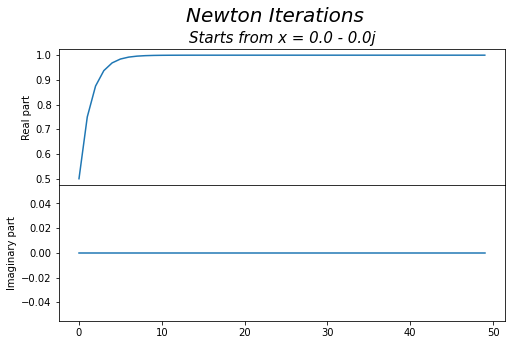

In [ ]:
(r, i) = newton_iteration(z=(0.0 - 0.0j),fu=1, dfu=1)
fig, axs = plt.subplots(ncols=1, nrows=2, gridspec_kw={'hspace': 0, 'wspace' : 0.2}, figsize=(8, 5));
fig.suptitle("Newton Iterations",fontsize=20, va='center', y=.97, fontstyle='oblique')
axs[0].plot(r)
axs[0].set_ylabel("Real part",fontsize='medium')
axs[0].set_title("Starts from x = 0.0 - 0.0j", fontsize=15, fontstyle='italic')
axs[1].plot(i)
axs[1].set_ylabel("Imaginary part",fontsize='medium');

### Análisis
Para esta funcion que poseé una raíz en 1 se puede observar que sin importar desde donde comience a iterar la parte real llegara a la raiz en pocas iteraciones y su parte imaginaria convergerá a 0, en este caso se pueden hacer iteraciones desde $0+0i$ ya que la derivada de esta funcion no da 0 al ser evaluada en ese punto

## Analitics roots of $x^2 - 1$
### Clasic way
$\begin{equation}
\begin{split}
x &= \frac{0\ \pm\sqrt{0 + 4}}{2} \\
x &= \pm\ 1
\end{split}
\end{equation}$
### Po Shen Lonh's
$\begin{equation}
\begin{split}
0 - x^2 &= -1\\
x^2 &= 1\\
x &= \pm\ 1
\end{split}
\end{equation}$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


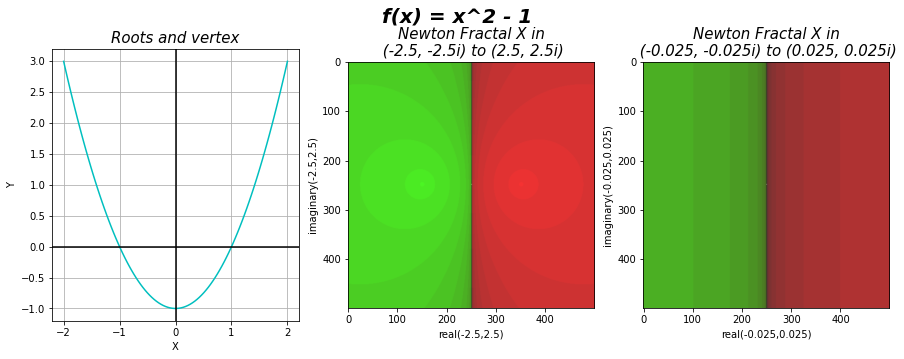

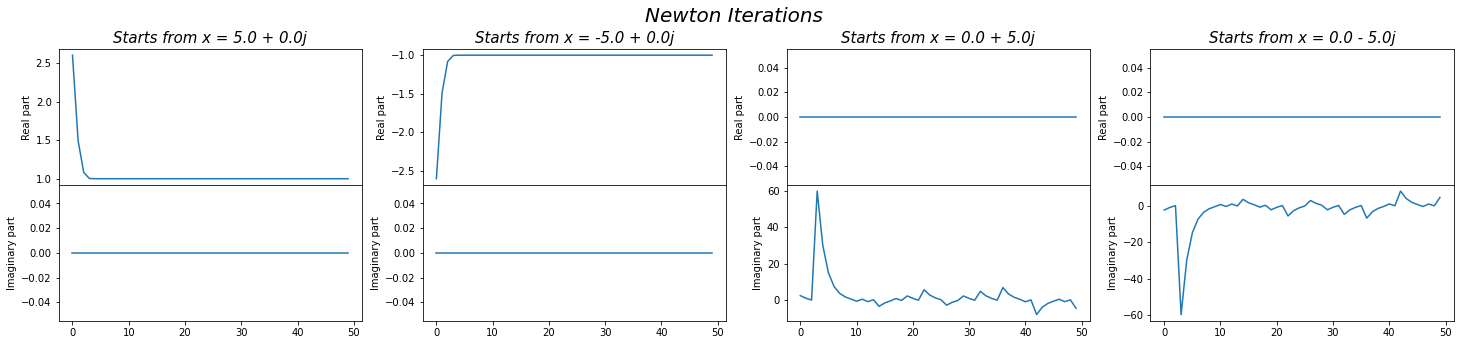

In [ ]:
(pimg, xlabel, ylabel, title) = display1(zoom=1, fu=2, dfu=0, r1=1);
fig, axs = plt.subplots(ncols=3, nrows=1, gridspec_kw={'hspace': 0.7, 'wspace' : 0.2}, figsize=(15, 5))
fig.suptitle("f(x) = x^2 - 1",fontsize=20, va='center', y=.97, fontstyle='oblique', fontweight='bold')

axs[0].plot(x,function[2], color='c')
axs[0].set_title('Roots and vertex', fontsize=15, fontstyle='italic')
axs[0].grid(b=True, axis='both')
axs[0].axhline(y=0, color='k')
axs[0].axvline(x=0, color='k')
axs[0].set_xlabel('X', fontsize=10)
axs[0].set_ylabel('Y', fontsize=10)

axs[1].imshow(pimg);
axs[1].set_title(title, fontsize=15, fontstyle='italic')
axs[1].set_xlabel(xlabel, fontsize='medium')
axs[1].set_ylabel(ylabel, fontsize=10);

(pimg, xlabel, ylabel, title) = display1(zoom=1/100, fu=2, dfu=0, r1=1);
axs[2].imshow(pimg);
axs[2].set_title(title, fontsize=15, fontstyle='italic')
axs[2].set_xlabel(xlabel, fontsize='medium')
axs[2].set_ylabel(ylabel, fontsize=10);


fig, axs = plt.subplots(ncols=4, nrows=2, gridspec_kw={'hspace': 0, 'wspace' : 0.2}, figsize=(25, 5));
fig.suptitle("Newton Iterations",fontsize=20, va='center', y=.97, fontstyle='oblique')

(r, i) = newton_iteration(z=(5.0 + 0.0j),fu=2, dfu=0)
axs[0, 0].plot(r)
axs[0, 0].set_ylabel("Real part",fontsize='medium')
axs[0, 0].set_title("Starts from x = 5.0 + 0.0j", fontsize=15, fontstyle='italic')
axs[1, 0].plot(i)
axs[1, 0].set_ylabel("Imaginary part",fontsize='medium');

(r, i) = newton_iteration(z=(-5.0 + 0.0j),fu=2, dfu=0)
axs[0, 1].plot(r)
axs[0, 1].set_ylabel("Real part",fontsize='medium')
axs[0, 1].set_title("Starts from x = -5.0 + 0.0j", fontsize=15, fontstyle='italic')
axs[1, 1].plot(i)
axs[1, 1].set_ylabel("Imaginary part",fontsize='medium');

(r, i) = newton_iteration(z=(0.0 + 5.0j),fu=2, dfu=0)
axs[0, 2].plot(r)
axs[0, 2].set_ylabel("Real part",fontsize='medium')
axs[0, 2].set_title("Starts from x = 0.0 + 5.0j", fontsize=15, fontstyle='italic')
axs[1, 2].plot(i)
axs[1, 2].set_ylabel("Imaginary part",fontsize='medium');

(r, i) = newton_iteration(z=(0.0 - 5.0j),fu=2, dfu=0)
axs[0, 3].plot(r)
axs[0, 3].set_ylabel("Real part",fontsize='medium')
axs[0, 3].set_title("Starts from x = 0.0 - 5.0j", fontsize=15, fontstyle='italic')
axs[1, 3].plot(i)
axs[1, 3].set_ylabel("Imaginary part",fontsize='medium');

### Análisis
Para esta función cullas raices son -1 y 1 se puede observar que si se itera desde la parte real la imaginaria se mantiene estable y la real converge a la raíz correspondienten, sin embargo, si dejamos la parte real fija e iteramos desde la parte imaginaria se puede observar que no converge, pero si se itera desde el punto $0+0i$ al hacer la derivada gernera un error al intentar dividir por cero.

## Analitics roots of $x^2 + 1$
### Clasic way
$\begin{equation}
\begin{split}
x &= \frac{0\ \pm\sqrt{0 - 4}}{2} \\
x &= i
\end{split}
\end{equation}$
### Po Shen Lonh's
$\begin{equation}
\begin{split}
0 - x^2 &= 1\\
x^2 &= -1\\
x &= \pm\ i
\end{split}
\end{equation}$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


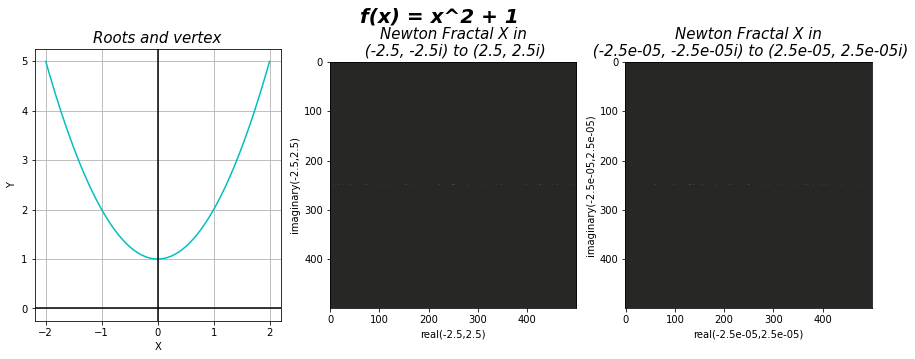

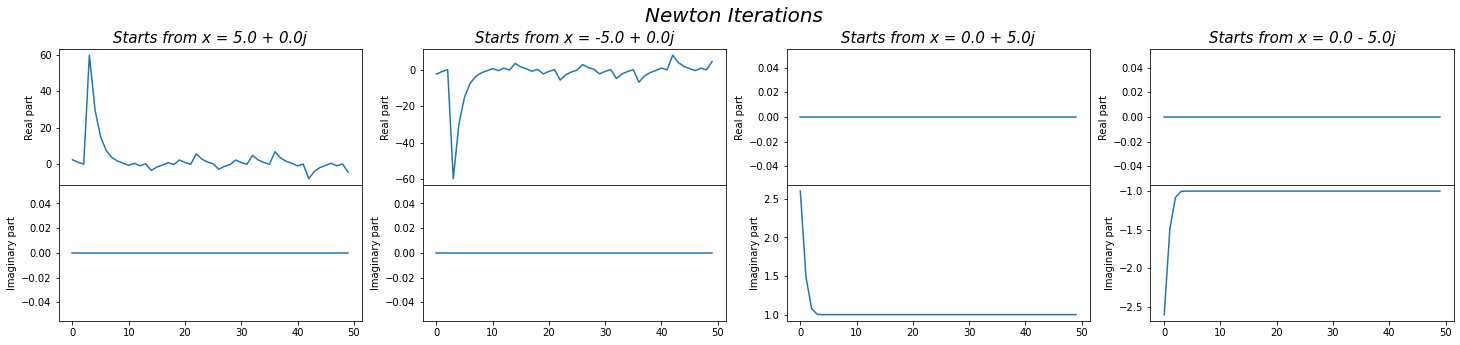

In [ ]:
(pimg, xlabel, ylabel, title) = display1(zoom=1, fu=3, dfu=0, r1=1);
fig, axs = plt.subplots(ncols=3, nrows=1, gridspec_kw={'hspace': 0.7, 'wspace' : 0.2}, figsize=(15, 5))
fig.suptitle("f(x) = x^2 + 1",fontsize=20, va='center', y=.97, fontstyle='oblique', fontweight='bold')

axs[0].plot(x,function[3], color='c')
axs[0].set_title('Roots and vertex', fontsize=15, fontstyle='italic')
axs[0].grid(b=True, axis='both')
axs[0].axhline(y=0, color='k')
axs[0].axvline(x=0, color='k')
axs[0].set_xlabel('X', fontsize=10)
axs[0].set_ylabel('Y', fontsize=10)

axs[1].imshow(pimg);
axs[1].set_title(title, fontsize=15, fontstyle='italic')
axs[1].set_xlabel(xlabel, fontsize='medium')
axs[1].set_ylabel(ylabel, fontsize=10);

(pimg, xlabel, ylabel, title) = display1(zoom=1/100000, fu=3, dfu=0, r1=1);
axs[2].imshow(pimg);
axs[2].set_title(title, fontsize=15, fontstyle='italic')
axs[2].set_xlabel(xlabel, fontsize='medium')
axs[2].set_ylabel(ylabel, fontsize=10);


fig, axs = plt.subplots(ncols=4, nrows=2, gridspec_kw={'hspace': 0, 'wspace' : 0.2}, figsize=(25, 5));
fig.suptitle("Newton Iterations",fontsize=20, va='center', y=.97, fontstyle='oblique')

(r, i) = newton_iteration(z=(5.0 + 0.0j),fu=3, dfu=0)
axs[0, 0].plot(r)
axs[0, 0].set_ylabel("Real part",fontsize='medium')
axs[0, 0].set_title("Starts from x = 5.0 + 0.0j", fontsize=15, fontstyle='italic')
axs[1, 0].plot(i)
axs[1, 0].set_ylabel("Imaginary part",fontsize='medium');

(r, i) = newton_iteration(z=(-5.0 + 0.0j),fu=3, dfu=0)
axs[0, 1].plot(r)
axs[0, 1].set_ylabel("Real part",fontsize='medium')
axs[0, 1].set_title("Starts from x = -5.0 + 0.0j", fontsize=15, fontstyle='italic')
axs[1, 1].plot(i)
axs[1, 1].set_ylabel("Imaginary part",fontsize='medium');

(r, i) = newton_iteration(z=(0.0 + 5.0j), fu=3, dfu=0)
axs[0, 2].plot(r)
axs[0, 2].set_ylabel("Real part",fontsize='medium')
axs[0, 2].set_title("Starts from x = 0.0 + 5.0j", fontsize=15, fontstyle='italic')
axs[1, 2].plot(i)
axs[1, 2].set_ylabel("Imaginary part",fontsize='medium');

(r, i) = newton_iteration(z=(0.0 - 5.0j), fu=3, dfu=0)
axs[0, 3].plot(r)
axs[0, 3].set_ylabel("Real part",fontsize='medium')
axs[0, 3].set_title("Starts from x = 0.0 - 5.0j", fontsize=15, fontstyle='italic')
axs[1, 3].plot(i)
axs[1, 3].set_ylabel("Imaginary part",fontsize='medium');

### Análisis
En esta funcion cullas raices no se pueden apreciar en el plano real se puede observar que no convergen sin importar desde que dirección se acerque uno, por el contrario si se itera en la parte imaginaria converge a 0 pero en el grafico del fractal de Newton solo se concigue divisar unos puntos a lo largo de una recta horizontal. 